In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_xor():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5 # (0.5-1, 0.5-1)
    X[50:100] = np.random.random((50, 2)) / 2 # (0-0.5, 0-0.5)
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([[0, 0.5]]) # (0-0.5, 0.5-1)
    X[150:] = np.random.random((50, 2)) / 2 + np.array([[0.5, 0]]) # (0.5-1, 0-0.5)
    Y = np.array([0]*100 + [1]*100)
    return X, Y

def get_donut():
    N = 200
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

def create_data():
    width = 8
    height = 8
    N = width * height
    X = np.zeros((N, 2))
    y = np.zeros(N)
    n = 0
    start_t = 0
    for i in range(width):
        t = start_t
        for j in range(height):
            X[n] = [i, j]
            y[n] = t
            n += 1
            t = (t + 1) % 2
        start_t = (t + 1) % 2
    return X, y

In [3]:
X, y = get_xor()

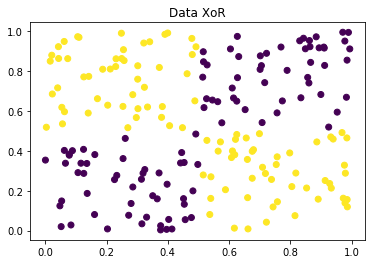

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);
plt.title("Data XoR");

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)

KNeighborsClassifier()

In [6]:
pred = model.predict(X)

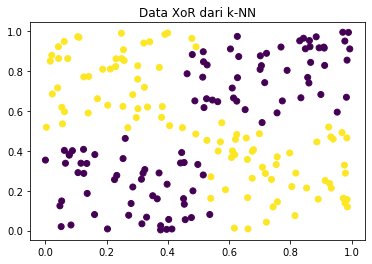

In [7]:
plt.scatter(X[:,0],X[:,1],c=pred);
plt.title("Data XoR dari k-NN");

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

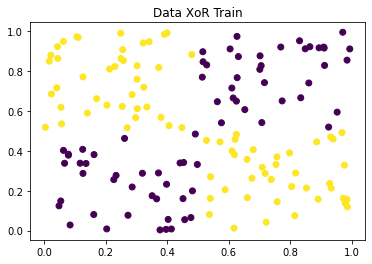

In [10]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train);
plt.title("Data XoR Train");

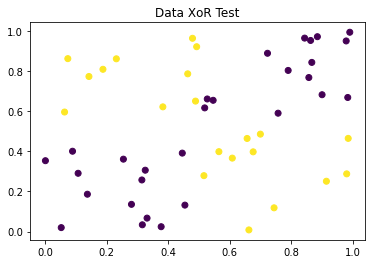

In [11]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test);
plt.title("Data XoR Test");

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
pred = model.predict(X_test)

In [14]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.81      1.00      0.89        17

    accuracy                           0.92        50
   macro avg       0.90      0.94      0.92        50
weighted avg       0.94      0.92      0.92        50



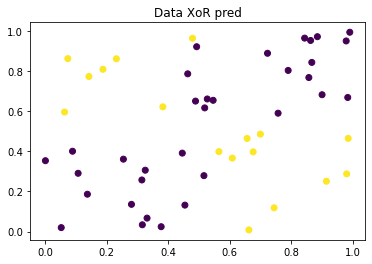

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred);
plt.title("Data XoR pred");

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
pred_lr = model.predict(X_test)

In [18]:
print(classification_report(pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.42      0.59        50

    accuracy                           0.42        50
   macro avg       0.50      0.21      0.30        50
weighted avg       1.00      0.42      0.59        50



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


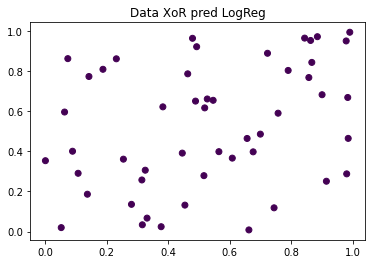

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_lr);
plt.title("Data XoR pred LogReg");

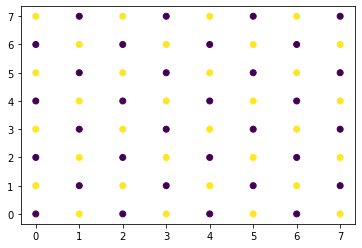

In [20]:
# knn gagal ketika 

X,y = create_data()

plt.scatter(X[:,0], X[:,1], c=y);

In [21]:
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier()

In [22]:
pred = model.predict(X)

In [23]:
print(classification_report(pred,y))

              precision    recall  f1-score   support

         0.0       0.06      0.06      0.06        32
         1.0       0.06      0.06      0.06        32

    accuracy                           0.06        64
   macro avg       0.06      0.06      0.06        64
weighted avg       0.06      0.06      0.06        64



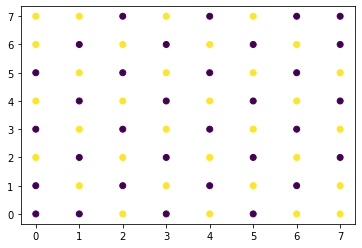

In [24]:
plt.scatter(X[:,0], X[:,1], c=pred);

In [25]:
from sklearn.svm import SVC, LinearSVC

In [26]:
lin_svc = LinearSVC()
rbf_svc = SVC(kernel='rbf', gamma=10, C=0.1)

In [27]:
rbf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=10)

In [28]:
lin_svc.fit(X_train, y_train)

LinearSVC()

In [29]:
pred_lin = lin_svc.predict(X_test)
pred_rbf = rbf_svc.predict(X_test)

In [30]:
print(classification_report(pred_lin,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.37      0.51        46

    accuracy                           0.34        50
   macro avg       0.40      0.18      0.25        50
weighted avg       0.74      0.34      0.47        50



In [31]:
print(classification_report(pred_rbf,y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.95      0.91      0.93        22

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



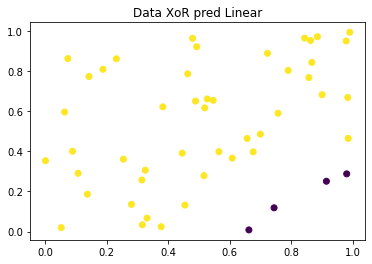

In [32]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_lin);
plt.title("Data XoR pred Linear");

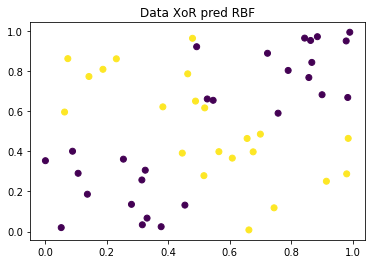

In [33]:
plt.scatter(X_test[:,0],X_test[:,1],c=pred_rbf);
plt.title("Data XoR pred RBF");

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(max_depth=10)

In [36]:
rf = RandomForestClassifier()

In [37]:
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

In [38]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [39]:
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [40]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.95      0.86      0.90        21

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50



In [41]:
import pandas as pd

df = pd.DataFrame(X)

In [42]:
df.columns = ['x1', 'x2']
df['label'] = y

In [43]:
df.head()

,x1,x2,label
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,0.0,2.0,0.0
3,0.0,3.0,1.0
4,0.0,4.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      64 non-null     float64
 1   x2      64 non-null     float64
 2   label   64 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


In [45]:
y = df['label']
df.drop('label', axis=1, inplace=True)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, 
                                                    test_size=0.25)

In [47]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()